#Detect Prominent Corners in Image

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

###Read in Image

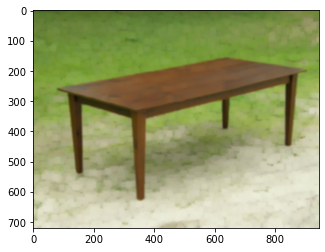

In [83]:
image = cv2.imread('resources/table.jpg')
img_original = np.copy(image)
imgRGB = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)

# Crop image
imgRGB = imgRGB[:,175:1120]

# Low Pass Filter
imgRGB = cv2.GaussianBlur(imgRGB, (9, 9), cv2.BORDER_DEFAULT)

#Reduce Noise w/ opening
kernel = np.ones((12,12))
imgRGB = cv2.morphologyEx(imgRGB, cv2.MORPH_OPEN, kernel)

plt.imshow(imgRGB)

###Detect Corners using Harris corner

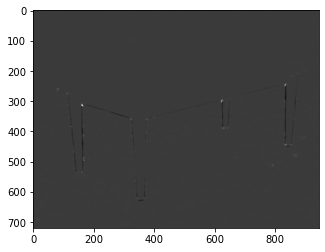

In [106]:
# Convert to grayscale
gray_image = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2GRAY)

# Detect Corners
corner_image = cv2.cornerHarris(gray_image, 2, 3, .005)

# Dialate
corner_image = cv2.dilate(corner_image, None)

plt.imshow(corner_image, cmap='gray')


###Mark Strong Corners with a Circle

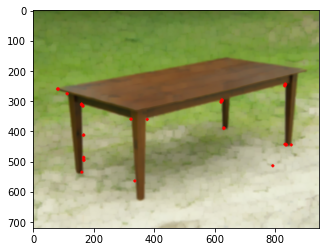

In [107]:
# Threshold
threshold = .1 * corner_image.max()

underlay = np.copy(imgRGB)
for y in range(0, corner_image.shape[0]):
    for x in range(0, corner_image.shape[1]):
        if (corner_image[y, x] > threshold):
            cv2.circle(underlay, (x, y), 2, (255,0,0), 4)

plt.imshow(underlay)

